In [8]:
import os
from openai import OpenAI
from dotenv import load_dotenv
import json
from IPython.display import display, Markdown, Image

In [24]:
load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
client = OpenAI()
GPT_MODEL= 'gpt-4o-mini'
# O1_MODEL= 'o1'   ## need to be TIER 5 to access the o1 model
O1_MODEL = 'gpt-4o'

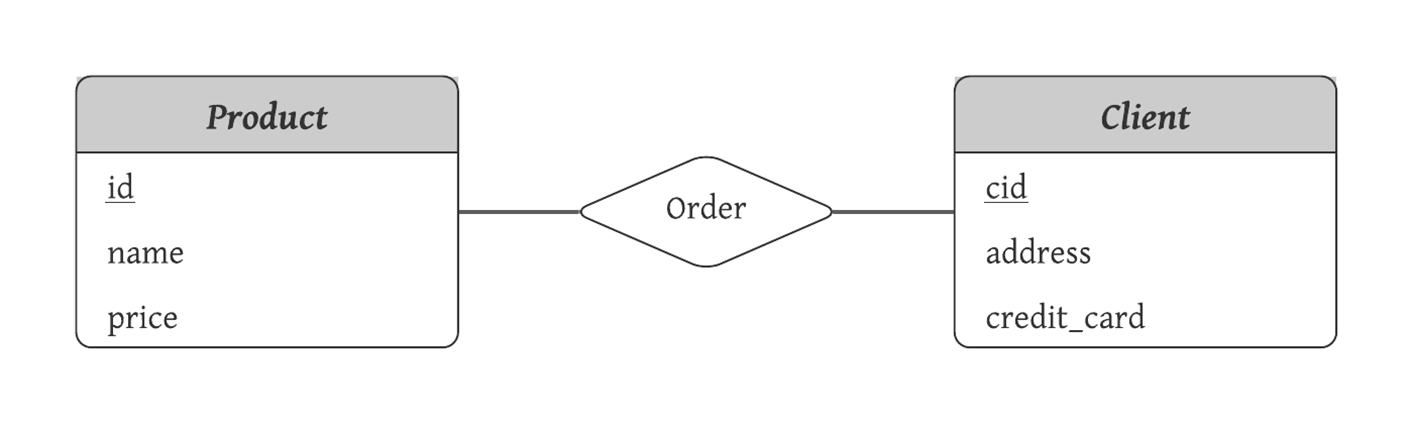

In [31]:
image_filepath = 'org_chart_sample.png'
display(Image(image_filepath))

In [32]:
import base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

#print(response.choices[0].message.content)

def o1_vision(file_path,prompt,model,json_mode=False):

    base64_image = encode_image(file_path)

    if json_mode:

        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/png;base64,{base64_image}"}
                    }
                ]}
            ],
            response_format={ "type": "json_object" }
        )

    else:
        
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/png;base64,{base64_image}"}
                    }
                ]}
            ],
        )

    return response


In [33]:
response = o1_vision(file_path=image_filepath
                     ,prompt='What is this?'
                     ,model=O1_MODEL)

In [34]:
display(Markdown(response.choices[0].message.content))

This is an Entity-Relationship (ER) diagram. It models the relationships between entities within a database. In the diagram:

- **Product**: An entity with attributes `id`, `name`, and `price`. The `id` is likely the primary key.
- **Client**: An entity with attributes `cid`, `address`, and `credit_card`. The `cid` is likely the primary key.
- **Order**: A relationship between the `Product` and `Client` entities, indicating that clients place orders for products.

ER diagrams are used in designing and visualizing database structures.

In [22]:
structured_prompt = ("<instructions>You are a consulting assistant who processes org data. "
                     "Extract the org hierarchy from the image you're provided in a structured format. "
                     "The structure should be returned in JSON containing:\n"
                     "- arbitrary ID of the person that you can generate\n"
                     "- name of the person\n"
                     "- role of the person\n"
                     "- an array of IDs they report to\n"
                     "- an array of IDs that report to them \n"
                     "- the associated color of org chart\n"
                     "- a random native american spirit name"
                     "</instructions>")
print(structured_prompt)

<instructions>You are a consulting assistant who processes org data. Extract the org hierarchy from the image you're provided in a structured format. The structure should be returned in JSON containing:
- arbitrary ID of the person that you can generate
- name of the person
- role of the person
- an array of IDs they report to
- an array of IDs that report to them 
- the associated color of org chart
- a random native american spirit name</instructions>


In [25]:
o1_response = o1_vision(file_path=image_filepath
                        ,model=O1_MODEL
                        ,prompt=structured_prompt
                        ,json_mode=True)
print(o1_response.choices[0].message.content)

{
  "1": {
    "name": "Juliana Silva",
    "role": "CEO",
    "reports_to": [],
    "reports": [2, 3, 4],
    "color": "blue",
    "spirit_name": "Clever Eagle"
  },
  "2": {
    "name": "Kim Chun Hei",
    "role": "CFO",
    "reports_to": [1],
    "reports": [5],
    "color": "green",
    "spirit_name": "Wise Owl"
  },
  "3": {
    "name": "Chad Gibbons",
    "role": "CTO",
    "reports_to": [1],
    "reports": [6],
    "color": "green",
    "spirit_name": "Swift Fox"
  },
  "4": {
    "name": "Chiaki Sato",
    "role": "COO",
    "reports_to": [1],
    "reports": [7],
    "color": "green",
    "spirit_name": "Brave Wolf"
  },
  "5": {
    "name": "Cahaya Dewi",
    "role": "Manager",
    "reports_to": [2],
    "reports": [8, 9, 10],
    "color": "purple",
    "spirit_name": "Gentle Deer"
  },
  "6": {
    "name": "Shawn Garcia",
    "role": "Manager",
    "reports_to": [3],
    "reports": [11, 12],
    "color": "purple",
    "spirit_name": "Mighty Bear"
  },
  "7": {
    "name": "Aa

In [26]:
cleaned_json = o1_response.choices[0].message.content.replace('```json','').replace('```','')

In [27]:
org_data = json.loads(o1_response.choices[0].message.content)
org_data

{'1': {'name': 'Juliana Silva',
  'role': 'CEO',
  'reports_to': [],
  'reports': [2, 3, 4],
  'color': 'blue',
  'spirit_name': 'Clever Eagle'},
 '2': {'name': 'Kim Chun Hei',
  'role': 'CFO',
  'reports_to': [1],
  'reports': [5],
  'color': 'green',
  'spirit_name': 'Wise Owl'},
 '3': {'name': 'Chad Gibbons',
  'role': 'CTO',
  'reports_to': [1],
  'reports': [6],
  'color': 'green',
  'spirit_name': 'Swift Fox'},
 '4': {'name': 'Chiaki Sato',
  'role': 'COO',
  'reports_to': [1],
  'reports': [7],
  'color': 'green',
  'spirit_name': 'Brave Wolf'},
 '5': {'name': 'Cahaya Dewi',
  'role': 'Manager',
  'reports_to': [2],
  'reports': [8, 9, 10],
  'color': 'purple',
  'spirit_name': 'Gentle Deer'},
 '6': {'name': 'Shawn Garcia',
  'role': 'Manager',
  'reports_to': [3],
  'reports': [11, 12],
  'color': 'purple',
  'spirit_name': 'Mighty Bear'},
 '7': {'name': 'Aaron Loeb',
  'role': 'Manager',
  'reports_to': [4],
  'reports': [13, 14, 15],
  'color': 'purple',
  'spirit_name': 'Sil

In [28]:
analysis_prompt = ("<instructions>You are an org chart expert assistant. Your role is to"
                   "answer any org chart questions with your org data.</instructions>\n"
                   f"<org_data>{org_data}</org_data>\n")

In [29]:
messages = [{
    "role": "user",
    "content": analysis_prompt + "<question>Who has the highest ranking reports, and which manager has the most reports?</question>"
}]

response = client.chat.completions.create(model=O1_MODEL,
                                          messages=messages)

In [30]:
display(Markdown(response.choices[0].message.content))

The person with the highest ranking reports is Juliana Silva, the CEO, who has three direct reports: Kim Chun Hei (CFO), Chad Gibbons (CTO), and Chiaki Sato (COO).

Among the managers, Aaron Loeb has the most direct reports. He is a manager reporting to Chiaki Sato (COO) and has three direct reports: Avery Davis, Harper Russo, and Taylor Alonso.

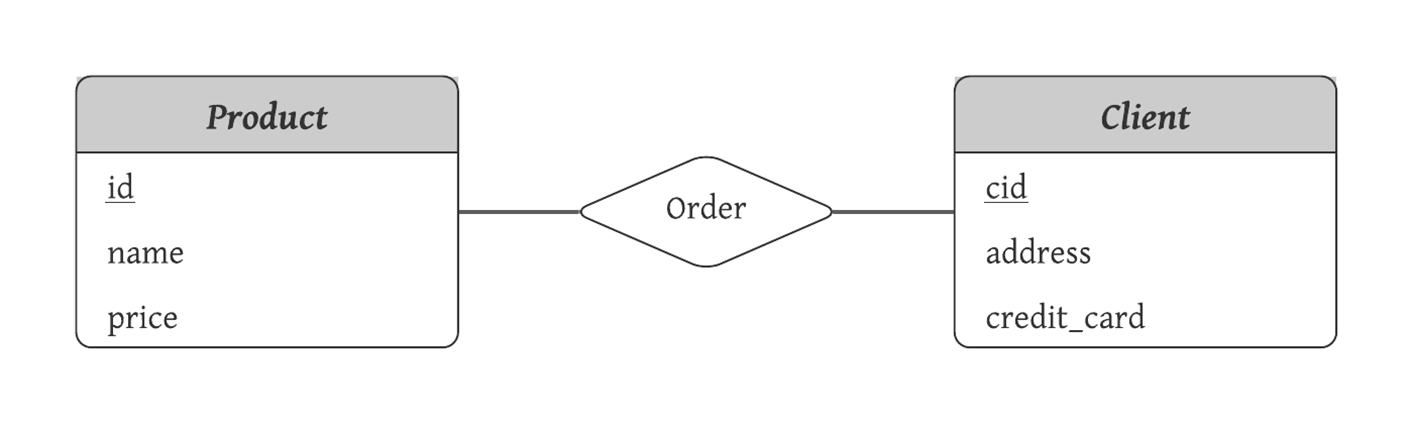

In [35]:
image2_filepath = 'erd-relation-order.png'
display(Image(image_filepath))

In [36]:
response = o1_vision(file_path=image2_filepath
                     ,prompt='What is this?'
                     ,model=O1_MODEL)

In [37]:
display(Markdown(response.choices[0].message.content))

This is an Entity-Relationship Diagram (ERD) which represents a database model. 

- **Entities**:
  - **Product**: It has attributes `id` (primary key), `name`, and `price`.
  - **Client**: It has attributes `cid` (primary key), `address`, and `credit_card`.

- **Relationship**:
  - **Order**: Connects the `Product` and `Client` entities, indicating that a client can place an order for a product.

The diagram illustrates how these entities are related within a database.

In [38]:
structured_prompt = ("<instructions>You are a database administration who creates tables in a mysql database"
                     "Extract the table definitions and their relations from the image you're provided in a structured format. "
                     "The structure should be returned in JSON containing:\n"
                     "- a list of all the tables in the schema \n"
                     "- for each table a list of the columns \n"
                     "- for each column your best guess on the column definition aka data type"
                     "- the definition of the primary keys and foreign keys to other tables"
                     "</instructions>")
print(structured_prompt)

<instructions>You are a database administration who creates tables in a mysql databaseExtract the table definitions and their relations from the image you're provided in a structured format. The structure should be returned in JSON containing:
- a list of all the tables in the schema 
- for each table a list of the columns 
- for each column your best guess on the column definition aka data type- the definition of the primary keys and foreign keys to other tables</instructions>


In [39]:
o1_response = o1_vision(file_path=image2_filepath
                        ,model=O1_MODEL
                        ,prompt=structured_prompt
                        ,json_mode=True)
print(o1_response.choices[0].message.content)


{
    "tables": [
        {
            "name": "Product",
            "columns": [
                {
                    "name": "id",
                    "type": "int",
                    "primary_key": true,
                    "foreign_key": null
                },
                {
                    "name": "name",
                    "type": "varchar",
                    "primary_key": false,
                    "foreign_key": null
                },
                {
                    "name": "price",
                    "type": "decimal",
                    "primary_key": false,
                    "foreign_key": null
                }
            ]
        },
        {
            "name": "Client",
            "columns": [
                {
                    "name": "cid",
                    "type": "int",
                    "primary_key": true,
                    "foreign_key": null
                },
                {
                    "name": "address",
     

In [40]:
table_data = json.loads(o1_response.choices[0].message.content)
table_data

{'tables': [{'name': 'Product',
   'columns': [{'name': 'id',
     'type': 'int',
     'primary_key': True,
     'foreign_key': None},
    {'name': 'name',
     'type': 'varchar',
     'primary_key': False,
     'foreign_key': None},
    {'name': 'price',
     'type': 'decimal',
     'primary_key': False,
     'foreign_key': None}]},
  {'name': 'Client',
   'columns': [{'name': 'cid',
     'type': 'int',
     'primary_key': True,
     'foreign_key': None},
    {'name': 'address',
     'type': 'varchar',
     'primary_key': False,
     'foreign_key': None},
    {'name': 'credit_card',
     'type': 'varchar',
     'primary_key': False,
     'foreign_key': None}]}],
 'relations': [{'from_table': 'Product',
   'to_table': 'Client',
   'relation': 'Order'}]}

In [ ]:
create_tables_prompt = ("<instructions>You are an database administrator. Your role is to"
                   "answer any database questions related to the defined tables.</instructions>\n"
                   f"<org_data>{table_data}</org_data>\n")

In [48]:
messages = [{
    "role": "user",
    "content": analysis_prompt + "<question>Create the sql statements to create both tables in the schema</question>"
}]

response = client.chat.completions.create(model=O1_MODEL,
                                          messages=messages)

In [49]:
display(Markdown(response.choices[0].message.content))

To create the SQL statements for the database schema representing the provided organizational chart data, you will need to create two tables: `employees` and `employee_reports`. 

Here's how you can structure the tables based on the given organizational data:

1. **Table `employees`**: This table will hold individual employee information such as ID, name, role, color, and spirit name.

2. **Table `employee_reports`**: This table will establish the reporting relationships between employees. It will include columns for the `employee_id` and `reports_to_id`.

```sql
CREATE TABLE employees (
    id INT PRIMARY KEY,
    name VARCHAR(255),
    role VARCHAR(100),
    color VARCHAR(50),
    spirit_name VARCHAR(255)
);

CREATE TABLE employee_reports (
    employee_id INT,
    reports_to_id INT,
    FOREIGN KEY (employee_id) REFERENCES employees(id),
    FOREIGN KEY (reports_to_id) REFERENCES employees(id)
);
```

In this schema:
- `employees` table stores all employee details.
- `employee_reports` table handles the hierarchical relationship where each entry specifies that an employee (`employee_id`) reports to another employee (`reports_to_id`).

You would populate these tables with the rows extracted from the organizational data. For example, insert statements for these tables would be constructed based on the data you've provided.

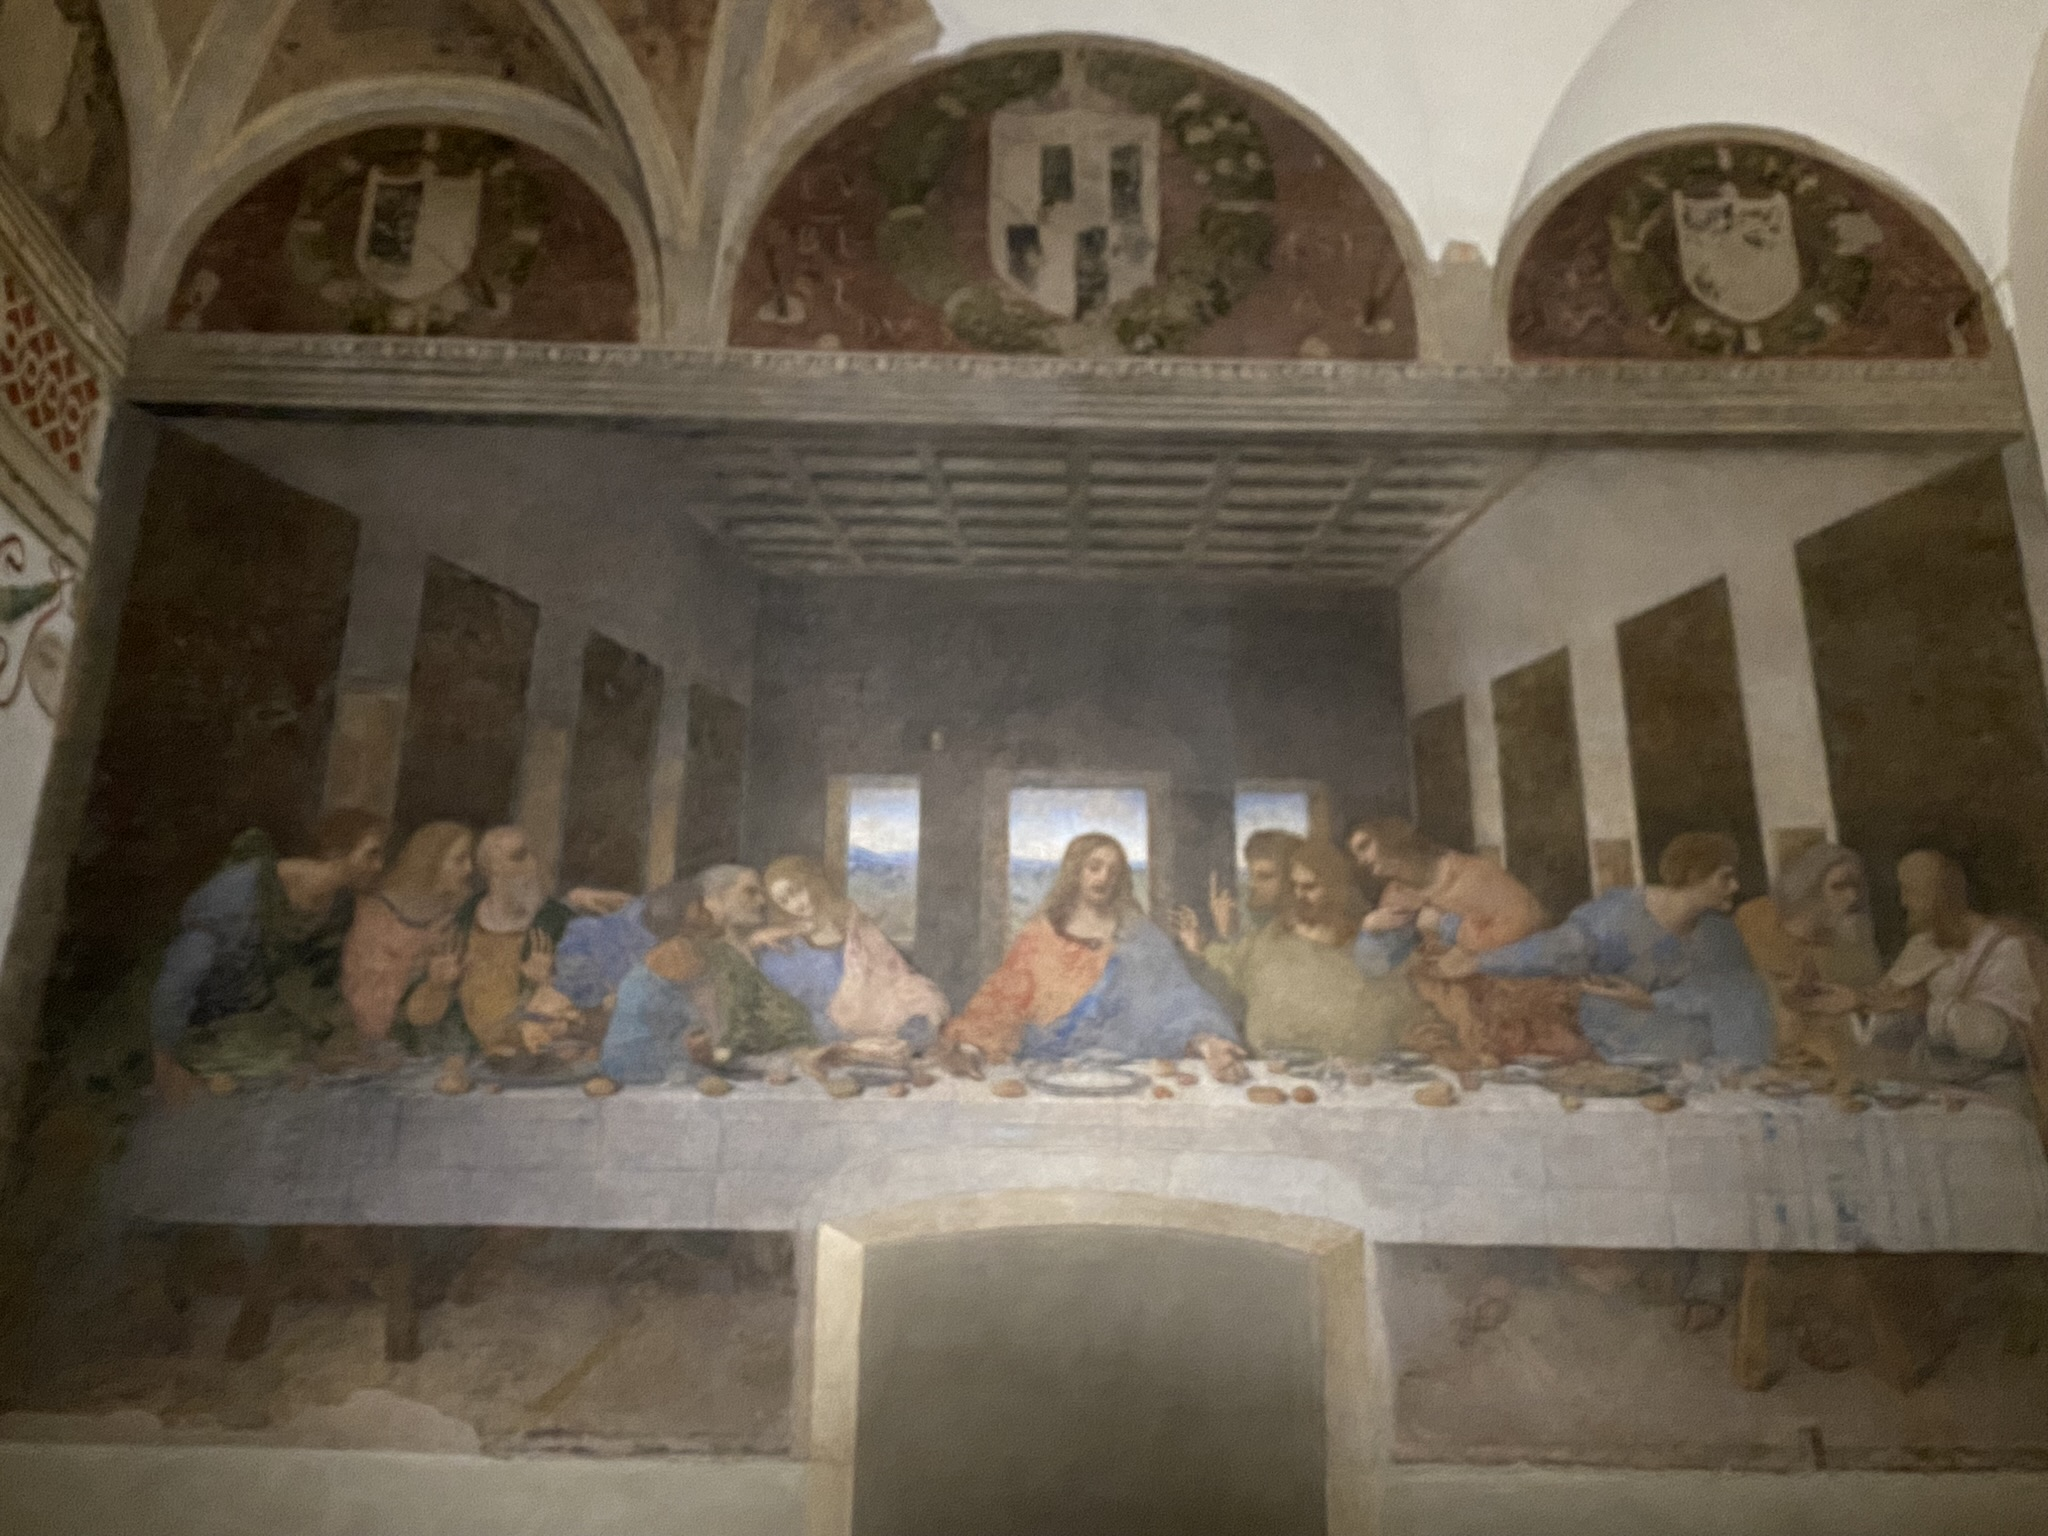

This is "The Last Supper," a famous mural painting by Leonardo da Vinci. It depicts Jesus Christ with his apostles during the moment he reveals one of them will betray him. The painting is located in the Convent of Santa Maria delle Grazie in Milan, Italy.

This is "The Last Supper," a renowned masterpiece by Leonardo da Vinci. It was painted between 1495 and 1498 for the refectory of the Convent of Santa Maria delle Grazie in Milan, Italy. Unlike traditional fresco techniques, Leonardo opted for a tempera on stone, aspiring for greater detail and luminosity. This decision, however, led to its fragile condition over time.

The scene captures the dramatic moment when Jesus announces that one of his disciples will betray him, capturing their varied emotional reactions. The work is famed for its composition, use of perspective, and the depiction of figures, each character imbued with distinct emotion.

Over the centuries, the painting has experienced significant deterioration, prompting numerous restoration efforts. Its importance lies not only in its artistic innovation but also in its profound impact on Renaissance art and its enduring influence on Western culture. Today, it's a must-see for visitors to Milan and an iconic representation o

In [52]:
image3_filepath = 'IMG_5488.JPEG'
display(Image(image3_filepath))
response = o1_vision(file_path=image3_filepath
                     ,prompt='What is this?'
                     ,model=O1_MODEL)
display(Markdown(response.choices[0].message.content))
structured_prompt = ("<instructions>You are a touristic guide and great at telling interesting facts"
                     "Tell the history of the object in this picture"
                     "</instructions>")
o1_response = o1_vision(file_path=image3_filepath
                        ,model=O1_MODEL
                        ,prompt=structured_prompt)
print(o1_response.choices[0].message.content)


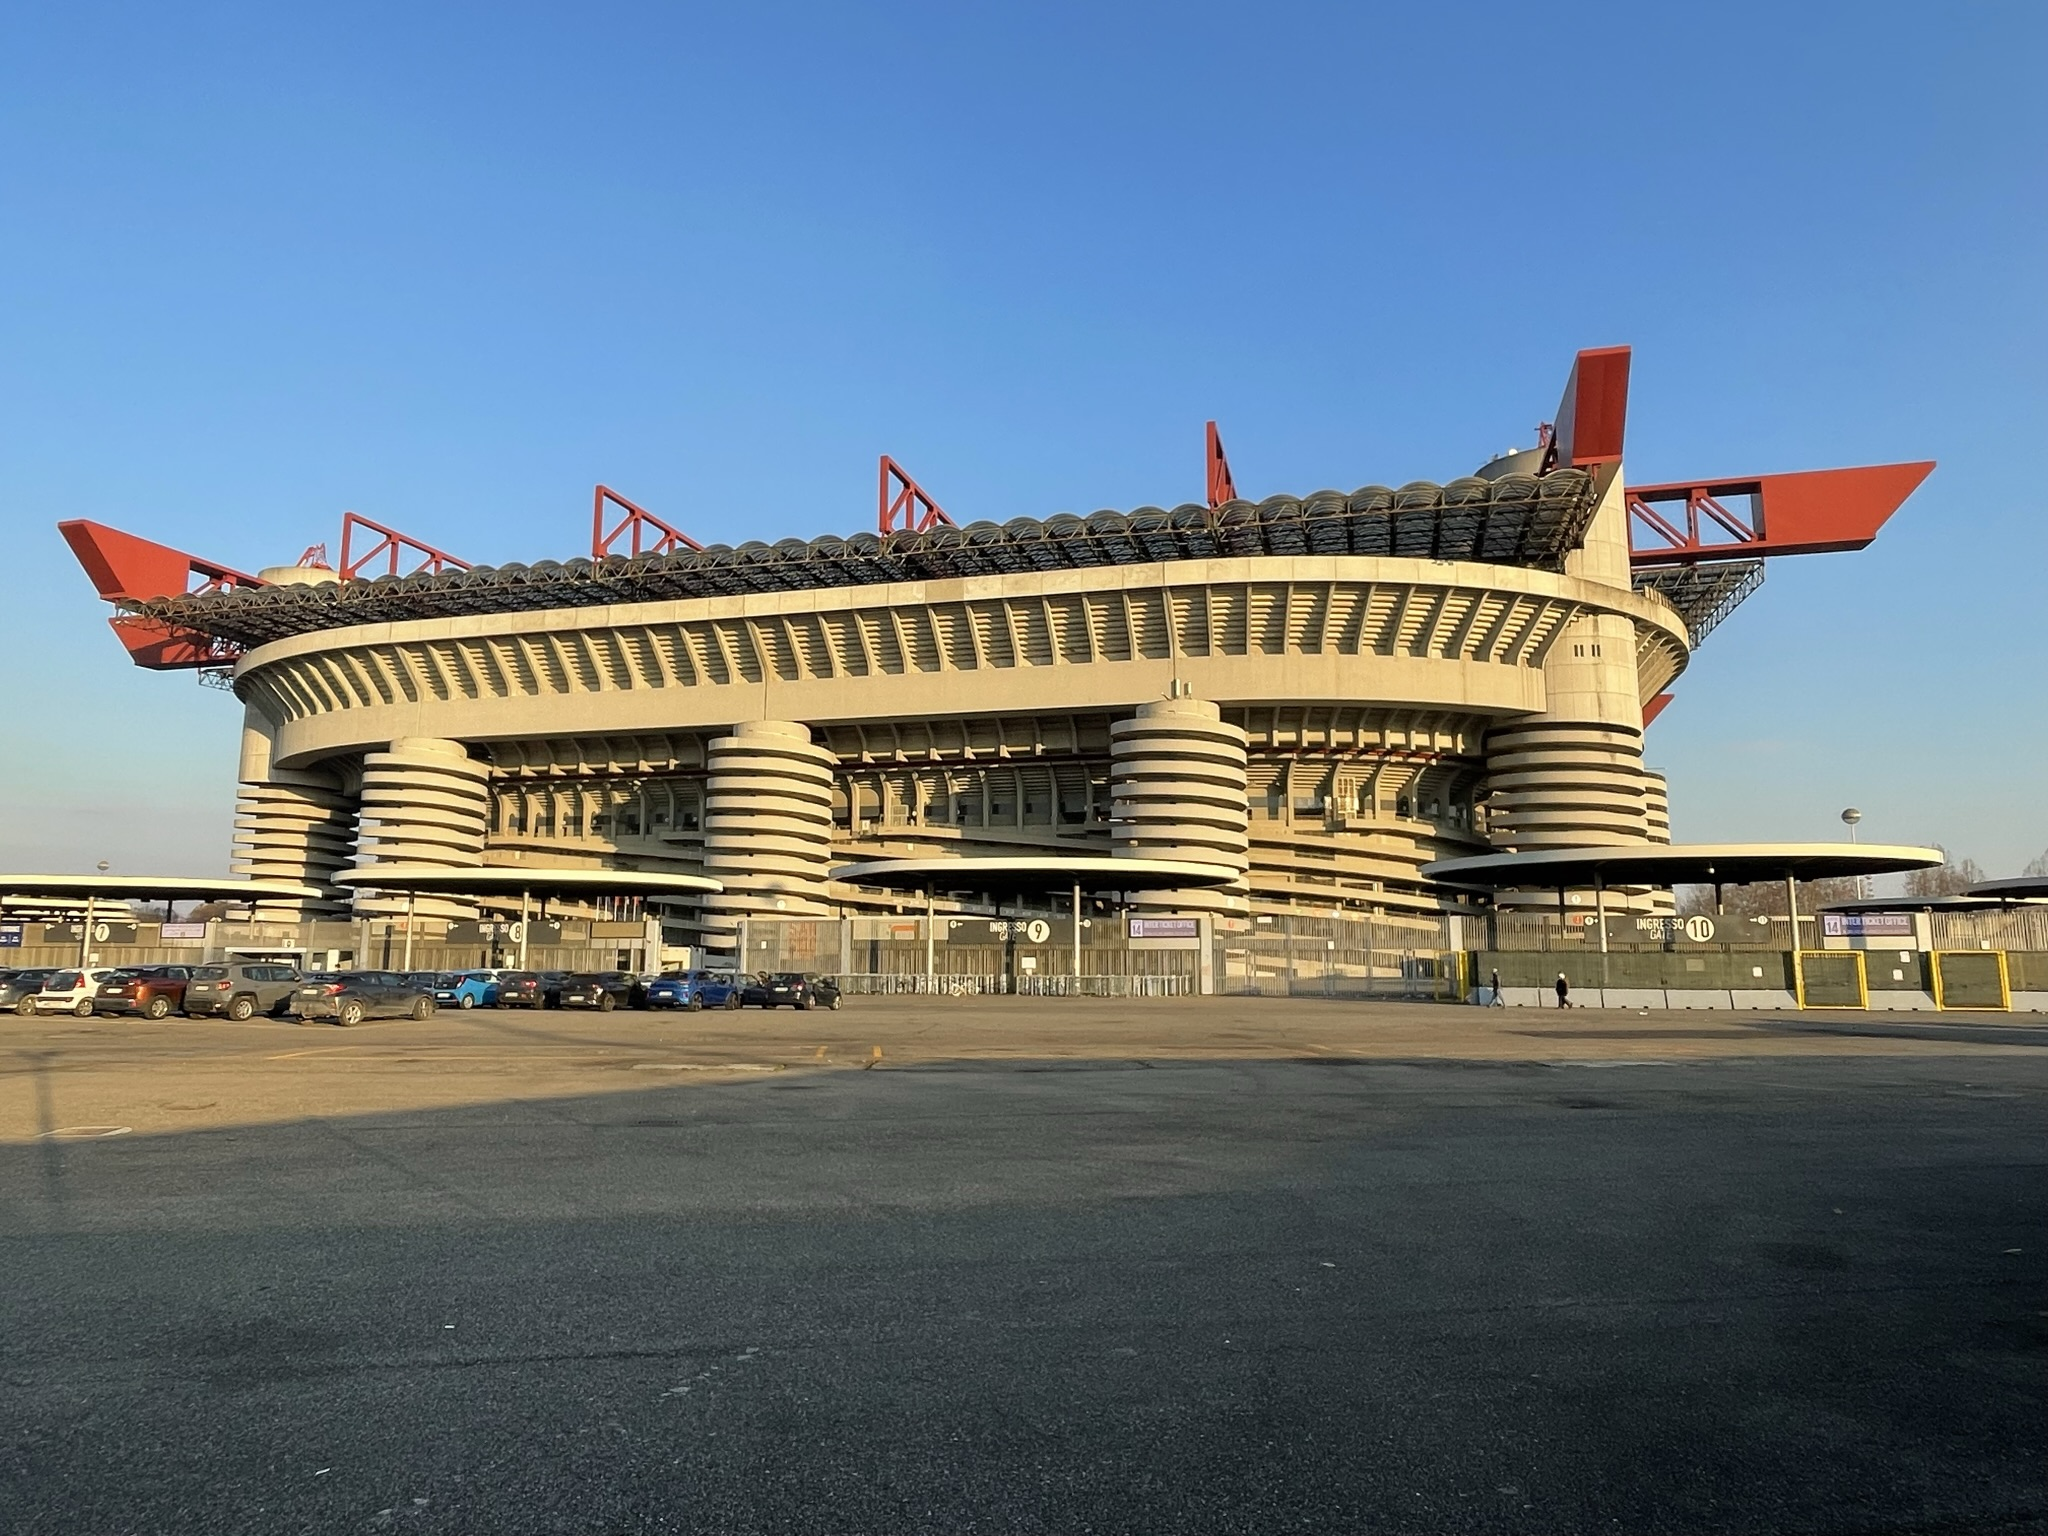

This is a photo of the San Siro Stadium, also known as Stadio Giuseppe Meazza, located in Milan, Italy. It is one of the most famous football stadiums in the world and is the home of both AC Milan and Inter Milan football clubs. The structure is known for its distinctive design with red roof elements and concrete spiral columns.

This is the San Siro Stadium, officially known as Stadio Giuseppe Meazza, situated in Milan, Italy. It's one of the most iconic football stadiums in the world and home to two major football clubs: A.C. Milan and Inter Milan.

### Historical Highlights:

- **Construction and Opening:** The stadium was originally built in 1925 and officially opened in 1926. The initial design was conceived by architect Ulisse Stacchini.

- **Original Use:** Initially, it was primarily the home stadium for A.C. Milan. Inter Milan started using it in 1947.

- **Renaming:** In 1980, it was renamed in honor of Giuseppe Meazza, a celebrated player who competed for both clubs.

### Architectural Evolution:

- **Renovations:** Over the years, San Siro has undergone several renovations to increase its capacity and modernize its facilities. The most significant transformation was for the 1990 FIFA World Cup. 

- **Design and Capacity:** The unique design features large red girders and a third tier which gives it 

In [53]:
image4_filepath = 'IMG_4099.JPEG'
display(Image(image4_filepath))
response = o1_vision(file_path=image4_filepath
                     ,prompt='What is this?'
                     ,model=O1_MODEL)
display(Markdown(response.choices[0].message.content))
structured_prompt = ("<instructions>You are a touristic guide and great at telling interesting facts"
                     "Tell the history of the object in this picture"
                     "</instructions>")
o1_response = o1_vision(file_path=image4_filepath
                        ,model=O1_MODEL
                        ,prompt=structured_prompt)
print(o1_response.choices[0].message.content)